In [42]:
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [43]:
df = pd.read_csv(r"https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream_interest.csv")

In [44]:
df.month = df.month.apply(lambda x : datetime.strptime(x, '%Y-%m'))
df.set_index("month", inplace=True)
df = df.asfreq(pd.infer_freq(df.index))

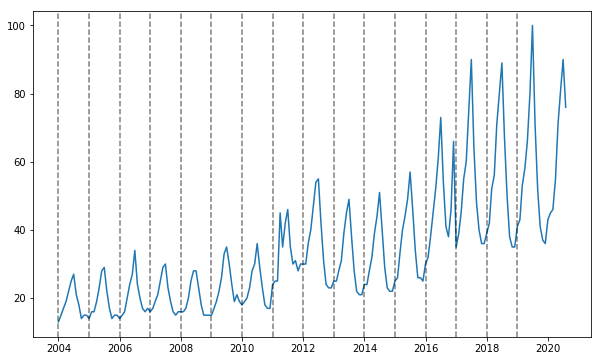

In [46]:
plt.figure(figsize=(10,6))
plt.plot(df)

min_index = df.index.min().year
max_index = df.index.max().year

for year in range(min_index, max_index):
    plt.axvline(datetime(year, 1, 1), linestyle='--', color='k', alpha=0.5)

AttributeError: 'str' object has no attribute 'year'

In [35]:
df.iloc[1]['month']

'2004-02'